In [2]:
import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)

In [3]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.options.display.float_format="{:,.2f}".format

In [5]:
#Loading the dataset
df = pd.read_csv("data/churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


In [6]:
#Dropping the columns that do not add value
df = df.drop(df.columns[0:3], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


In [7]:
df.shape

(10000, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
#Finding the categorical features and the amount of different values the have

categorical=df.select_dtypes(include="object").columns

for line in categorical:
    print("The feature " + line + " contains" ,  str(len(df[line].unique())) ," distinct values ")

The feature Geography contains 3  distinct values 
The feature Gender contains 2  distinct values 


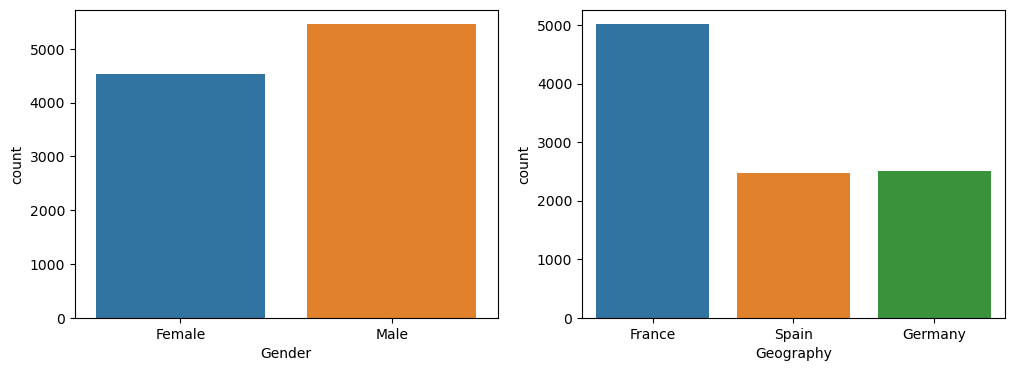

In [10]:
#Analyzing the distributions of the categorical features

f,axes=plt.subplots(1,2,figsize=(12,4))

sns.countplot(df["Gender"],ax=axes[0]);
sns.countplot(df['Geography'],ax=axes[1]);

In [11]:
#Creating new features with the help of get_dummies

for column in categorical:
    nuevas_features = pd.get_dummies(df[column])
    df= pd.merge(
        left=df,
        right=nuevas_features,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,"101,348.88",1,1,0,0,1,0
1,608,41,1,"83,807.86",1,0,1,"112,542.58",0,0,0,1,1,0
2,502,42,8,"159,660.80",3,1,0,"113,931.57",1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,"93,826.63",0,1,0,0,1,0
4,850,43,2,"125,510.82",1,1,1,"79,084.10",0,0,0,1,1,0


In [13]:
#Defining X and y
X=df.drop(columns=["Exited"])
y=df[["Exited"]]

In [14]:
#Finding the percentage of each class
(y.value_counts()/y.shape[0])*100

Exited
0        79.63
1        20.37
dtype: float64

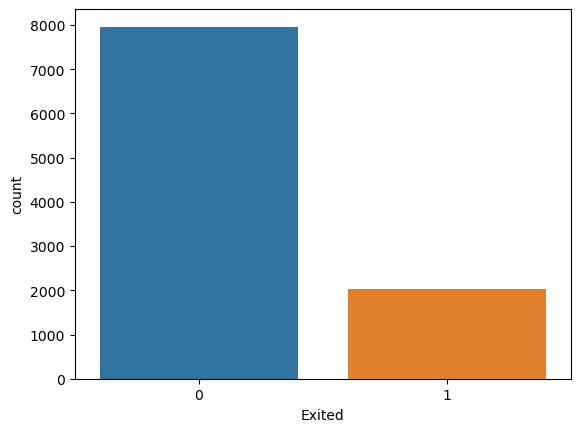

In [15]:
sns.countplot(data=df,x="Exited");

In [16]:
#Managing the imbalanced classes with imblearn

from imblearn.combine import SMOTEENN

imp=SMOTEENN(sampling_strategy=0.99)

X_bal,y_bal=imp.fit_resample(X,y)

#Finding out if the imbalaced data continues

y_bal.value_counts(normalize=True)*100

Exited
1        55.18
0        44.82
dtype: float64

In [17]:
#Saving the new data in order to save time in the future analysis

new_data=pd.concat([X_bal,y_bal],axis=1)

new_data.to_csv("new_data_churn_lab_platzi.csv",index=False)

In [18]:
#Splitting the data in train and test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_bal,y_bal,test_size=0.3, random_state=42)

In [19]:
#Standardization the data

from sklearn.preprocessing import StandardScaler

scaler_x=StandardScaler()

scaler_x.fit(X_train)

X_train=pd.DataFrame(scaler_x.transform(X_train),columns=X_train.columns)

X_test=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)

In [20]:
#EVALUATING DIFFERENT MACHINE LEARNING MODELS

#Importing the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.preprocessing import StandardScaler


In [21]:
#Preparing the models
models=[]
models.append(("Logistic Regression",LogisticRegression(solver="lbfgs",max_iter=10000)))
models.append(("LDA",LinearDiscriminantAnalysis()))
models.append(("Naive Bayes",GaussianNB()))
# models.append(("SVM",SVC(gamma="auto")))
models.append(("KNN",KNeighborsClassifier()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Bagging Class",BaggingClassifier()))
models.append(("Extra trees",ExtraTreesClassifier()))
models.append(("Ada Boost",AdaBoostClassifier()))
models.append(("Gradient Boosting",GradientBoostingClassifier()))

#Evaluating each model in turn
results=[]
names=[]
scoring="accuracy"
scaler=StandardScaler()

for name, model in models:
  kfold=KFold(n_splits=10,shuffle=True)
  cv_results=cross_val_score(model,X_train,y_train.values.reshape(-1,1).ravel(),cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name} :{cv_results.mean()*100:,.2f}% ({cv_results.std()*100:.2f}%)")

Logistic Regression :85.09% (1.81%)
LDA :84.63% (1.21%)
Naive Bayes :80.60% (1.17%)
KNN :85.58% (1.43%)
Decision Tree :84.36% (1.51%)
Random Forest :89.35% (1.75%)
Bagging Class :87.52% (1.16%)
Extra trees :89.20% (1.31%)
Ada Boost :87.67% (1.17%)
Gradient Boosting :89.38% (1.07%)


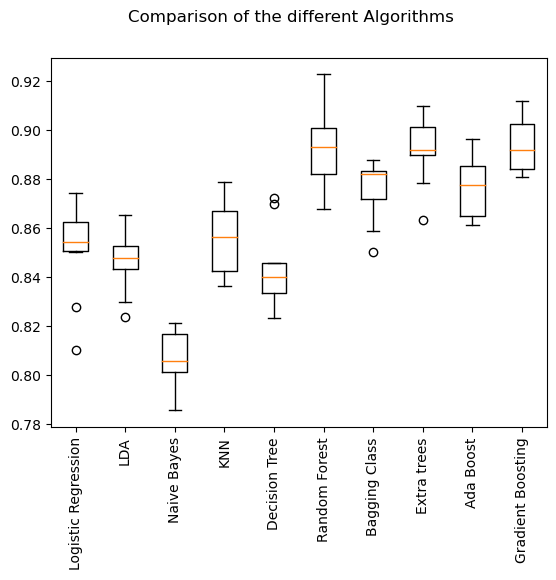

In [22]:
import matplotlib.pyplot as plt
fig=plt.figure()
fig.suptitle("Comparison of the different Algorithms")
ax=fig.add_subplot(111)
plt.rcParams["figure.figsize"]=[4,6]
plt.boxplot(results)
ax.set_xticklabels(names,rotation="vertical")
plt.show()

In [23]:
#Fine Tuning the best model

from sklearn.model_selection import GridSearchCV

import numpy as np

max_depth=np.arange(10,21)

parametros=dict(max_depth=max_depth)

model=RandomForestClassifier()

kfold=KFold(n_splits=5,shuffle=True)

grid_result=GridSearchCV(estimator=model,param_grid=parametros,cv=kfold)

grid_result.fit(X_train,(y_train.values.reshape(-1,1)).ravel())

#Summarize_results

print("Best : %f using the params %s" % (grid_result.best_score_ , grid_result.best_params_))

means=grid_result.cv_results_["mean_test_score"]
stds=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]


for mean,stdev,param in zip(means,stds,params):
    
  print("%f (%f) with %r" % (mean,stdev,param))

Best : 0.892425 using the params {'max_depth': 16}
0.889774 (0.009373) with {'max_depth': 10}
0.891099 (0.009409) with {'max_depth': 11}
0.891320 (0.011697) with {'max_depth': 12}
0.891762 (0.010874) with {'max_depth': 13}
0.890436 (0.009611) with {'max_depth': 14}
0.891321 (0.011535) with {'max_depth': 15}
0.892425 (0.010523) with {'max_depth': 16}
0.891763 (0.010223) with {'max_depth': 17}
0.891099 (0.009375) with {'max_depth': 18}
0.892205 (0.013194) with {'max_depth': 19}
0.892424 (0.010960) with {'max_depth': 20}


In [24]:
#Saving the fine_tuned model
from pickle import dump
dump(grid_result,open("Models_Jupyter_Notebook/tune_model_lab_platzi.pkl","wb"))

In [25]:
#Saving the scaler
from pickle import dump
dump(scaler_x,open("Models_Jupyter_Notebook/scaler_x.pkl","wb"))

In [26]:
#Evaluating the model using cohen_kappa and classification_report

from sklearn.metrics import cohen_kappa_score,classification_report

y_pred=pd.DataFrame(grid_result.predict(X_test).reshape(-1,1),columns=y_test.columns)

kappa=cohen_kappa_score(y_test,y_pred)

clas_rep=classification_report(y_test,y_pred)

print("Cohen Kappa : %f  " % (kappa))
print("="*80)
print("Classification Report:")
print(clas_rep)

Cohen Kappa : 0.807419  
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       878
           1       0.91      0.92      0.91      1063

    accuracy                           0.90      1941
   macro avg       0.90      0.90      0.90      1941
weighted avg       0.90      0.90      0.90      1941



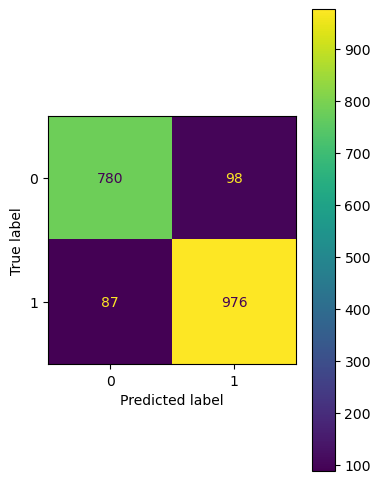

In [27]:
#Evaluating the model with a confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid_result,X_test,y_test.values.reshape(-1,1).ravel());

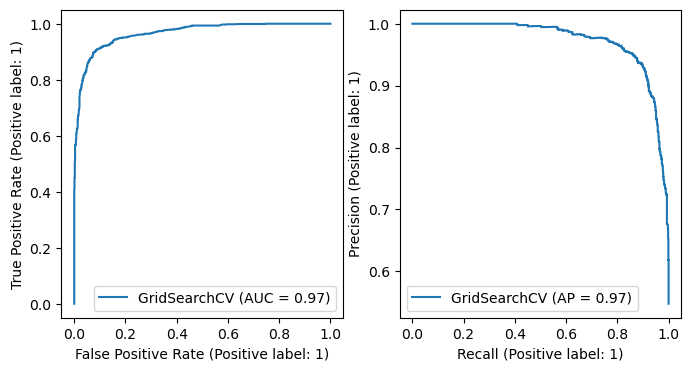

In [28]:
#Using precision_recall curve and roc_curve

from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

fig,ax=plt.subplots(1,2,figsize=(8,4));

plot_roc_curve(grid_result,X_test,y_test.values.reshape(-1,1).ravel(),ax=ax[0]);

plot_precision_recall_curve(grid_result,X_test,y_test.values.reshape(-1,1).ravel(),ax=ax[1]);

In [29]:
#SOLVING THE PROBLEM WITH ARTIFICIAL NEURAL NETWORKS

In [30]:
#Importing the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early=EarlyStopping(monitor="val_accuracy", patience=10)

In [32]:
#Creating the model
model=Sequential()
model.add(Dense(256,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",metrics="accuracy",loss="binary_crossentropy")
history=model.fit(X_train,y_train,epochs=200,batch_size=16,validation_split=0.2,callbacks=[early])

Epoch 1/200
227/227 [==============================] - 3s 6ms/step - loss: 0.3618 - accuracy: 0.8318 - val_loss: 0.2886 - val_accuracy: 0.8554
Epoch 2/200
227/227 [==============================] - 1s 4ms/step - loss: 0.2731 - accuracy: 0.8779 - val_loss: 0.2685 - val_accuracy: 0.8764
Epoch 3/200
227/227 [==============================] - 1s 3ms/step - loss: 0.2582 - accuracy: 0.8826 - val_loss: 0.2597 - val_accuracy: 0.8797
Epoch 4/200
227/227 [==============================] - 1s 4ms/step - loss: 0.2494 - accuracy: 0.8857 - val_loss: 0.2648 - val_accuracy: 0.8742
Epoch 5/200
227/227 [==============================] - 1s 4ms/step - loss: 0.2392 - accuracy: 0.8948 - val_loss: 0.2738 - val_accuracy: 0.8687
Epoch 6/200
227/227 [==============================] - 1s 3ms/step - loss: 0.2372 - accuracy: 0.8920 - val_loss: 0.2549 - val_accuracy: 0.8863
Epoch 7/200
227/227 [==============================] - 1s 4ms/step - loss: 0.2232 - accuracy: 0.9006 - val_loss: 0.2556 - val_accuracy: 0.8775

In [33]:
#Evaluating the model
model.evaluate(X_test,y_test,verbose=0)

[0.3592863380908966, 0.8712003827095032]

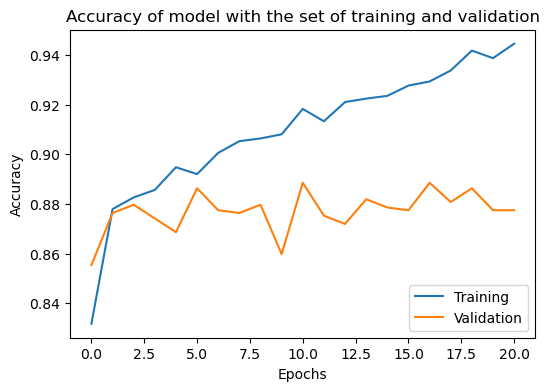

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"]);
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy of model with the set of training and validation")
plt.xlabel("Epochs");
plt.ylabel("Accuracy");
plt.legend(["Training","Validation"],loc="lower right");

In [35]:
#Evaluating the model using classification_report

from sklearn.metrics import classification_report

y_pred=model.predict(X_test,verbose=0).round()

clas_rep=classification_report(y_test,y_pred)

print("Classification Report:")

print(clas_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       878
           1       0.88      0.88      0.88      1063

    accuracy                           0.87      1941
   macro avg       0.87      0.87      0.87      1941
weighted avg       0.87      0.87      0.87      1941



In [36]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.round()
    return y_pred

classifier = estimator(model,[0,1])

61/61 [==============================] - 0s 2ms/step


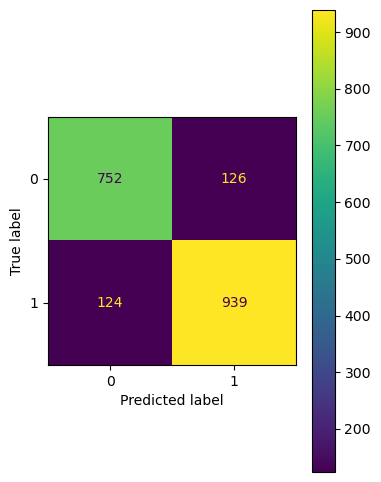

In [37]:
plot_confusion_matrix(classifier,X_test,y_test);